# Waffle Plot

In [79]:
import sys
from pathlib import Path
from pywaffle import Waffle # PyWaffle Documentation --> https://buildmedia.readthedocs.org/media/pdf/pywaffle/latest/pywaffle.pdf
import matplotlib.pyplot as plt #Matplotlib pyplot to plot the charts
import pandas as pd
import matplotlib as mpl
from highlight_text import htext #used for highlighting the title
import math

In [80]:
# Show all columns in the same line
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.max_colwidth', None)

In [81]:
cleaned_data_dir = Path('cleaned_data')
# input_files = list(cleaned_data_dir.glob("Stats La FOTTA EUCF 2024 - *.csv"))

# clutch_kpi = pd.read_csv(cleaned_data_dir.glob("clutch_kpi.csv"))
# clutch_kpi = pd.read_csv(cleaned_data_dir / "clutch_kpi.csv", index=False)
clutch_kpi = pd.read_csv(cleaned_data_dir / "clutch_kpi.csv")
print(clutch_kpi.head())
kpi = pd.read_csv(cleaned_data_dir / "kpi.csv")
print(kpi.head())


   player_id    name  jersey_number role line          team  pt_played_o  o_possessions_points  o_possessions  pt_played_d  d_possessions_points  d_possessions  pt_played_tot  tot_possessions_points  tot_possessions  scoring_impact  tov_recovery_impact  break_efficiency
0          0   Laffi             13    H    O  BFD La Fotta           31              1.290323             40            0                   0.0             16             31                1.806452               56        0.600000             0.562500               NaN
1          1   Nando             64    H    O  BFD La Fotta           14              1.357143             19            0                   0.0              8             14                1.928571               27        0.578947             0.625000               NaN
2          2   Coppi             22    H    O  BFD La Fotta           10              1.600000             16            0                   0.0             10             10             

# Vizualize Points & Possessions Played by Player, Role, Line & Team

In [108]:
#Make a copy of the dataframe only with the rows I want
df = kpi[['name','o_possessions','d_possessions','tot_possessions']].copy()
# data1 = clutch_kpi[['name','jersey_number','role','line','pt_played_o','o_possessions','pt_played_d','d_possessions','pt_played_tot','tot_possessions']].copy()

#Create a total to sort the data
# data1['Total'] = data1[['Left','Right','Head','Other']].sum(axis=1)
max_tot_ps = int(kpi['tot_possessions'].max())
df = df.sort_values(by=['tot_possessions'],ascending=False)
df = df.drop('tot_possessions',axis=1)
df = df.T
df.columns = df.iloc[0]
df = df.drop('name')

player_names = df.columns.values.tolist()
df = pd.DataFrame(df, columns=player_names)
print(df)




#Make a copy of the dataframe only with the rows I want
df_clutch = clutch_kpi[['name','o_possessions','d_possessions','tot_possessions']].copy()
# data1 = clutch_kpi[['name','jersey_number','role','line','pt_played_o','o_possessions','pt_played_d','d_possessions','pt_played_tot','tot_possessions']].copy()

#Create a total to sort the data
# data1['Total'] = data1[['Left','Right','Head','Other']].sum(axis=1)
max_tot_ps = int(clutch_kpi['tot_possessions'].max())
df_clutch = df_clutch.sort_values(by=['tot_possessions'],ascending=False)
df_clutch = df_clutch.drop('tot_possessions',axis=1)
df_clutch = df_clutch.T
df_clutch.columns = df_clutch.iloc[0]
df_clutch = df_clutch.drop('name')

player_names_clutch = df_clutch.columns.values.tolist()
df_clutch = pd.DataFrame(df_clutch, columns=player_names_clutch)
print(df_clutch)




              Pingu Laffi Ventu Cioppo Gas Mastro Lollo Seba Jan Bebo Tal Mancio Dede Krash Gio Coppi Nando Edo Kais Rosi Gatti Zeno Toni Martin Gabbo
o_possessions    54    93    48     84  83     47    39   73  35   71  33     64   32    22  51    46    50  51   21   44    20   21   17     10     8
d_possessions    87    43    85     42  39     70    73   36  69   30  65     31   52    54  24    27    23  21   51   25    40   38   32     26    21
              Pingu Cioppo Ventu Mastro Gas Laffi Seba Jan Lollo Bebo Mancio Tal Dede Gatti Edo Krash Kais Nando Coppi Zeno Rosi Gio Toni Gabbo Martin
o_possessions    23     40    23     25  40    40   34  16    17   32     28  13   13    11  22     9    9    19    16    9   15  15    6     5      3
d_possessions    37     19    36     33  18    16   18  35    32   14     13  24   20    20   9    19   19     8    10   15    7   6   11    11      5


In [109]:
players_per_row = 4
total_rows = math.ceil(len(player_names) / players_per_row)

background = "#313332"
colors=("#a3a3c2", "#75a3a3"),

# Documentation PyWaffle https://pywaffle.readthedocs.io/en/latest/examples/subplots.html


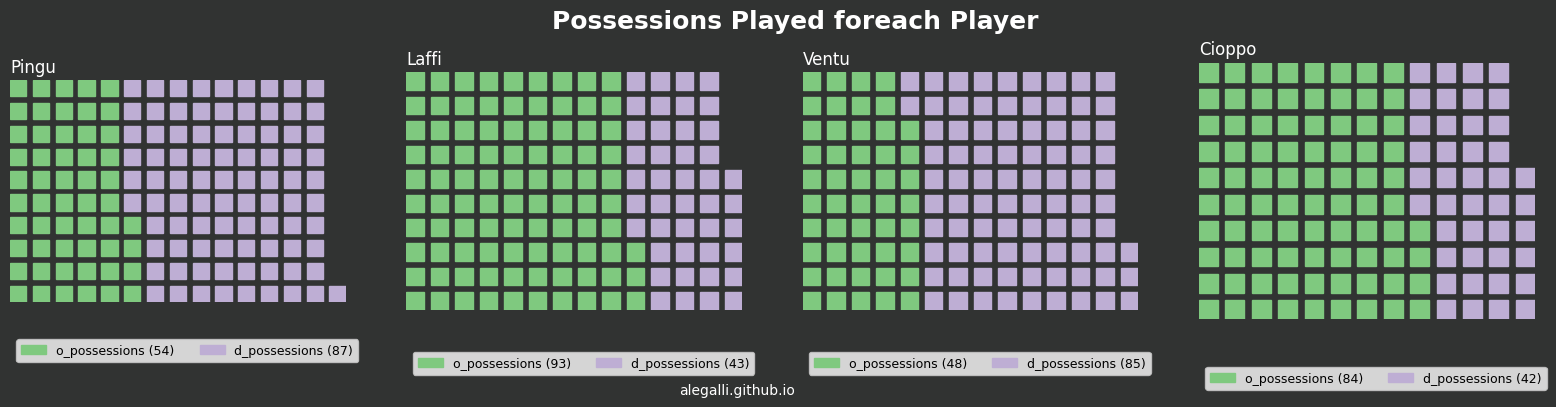

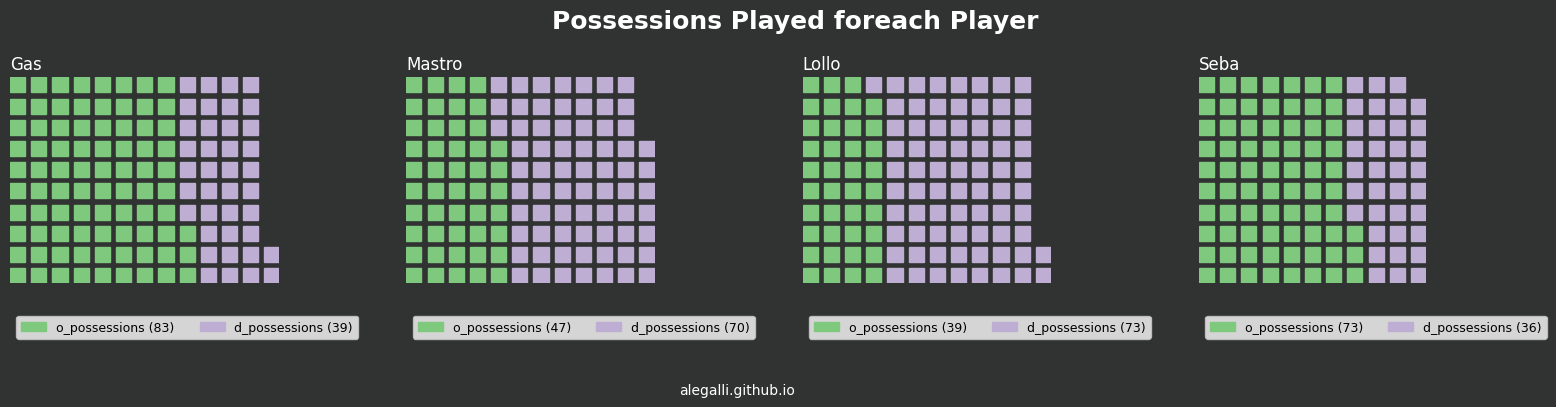

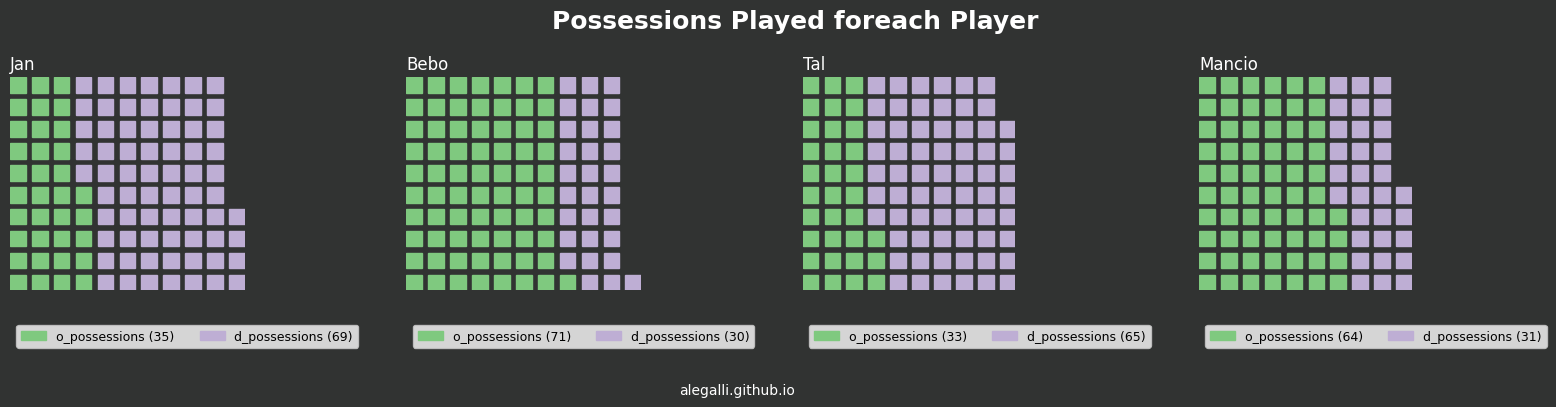

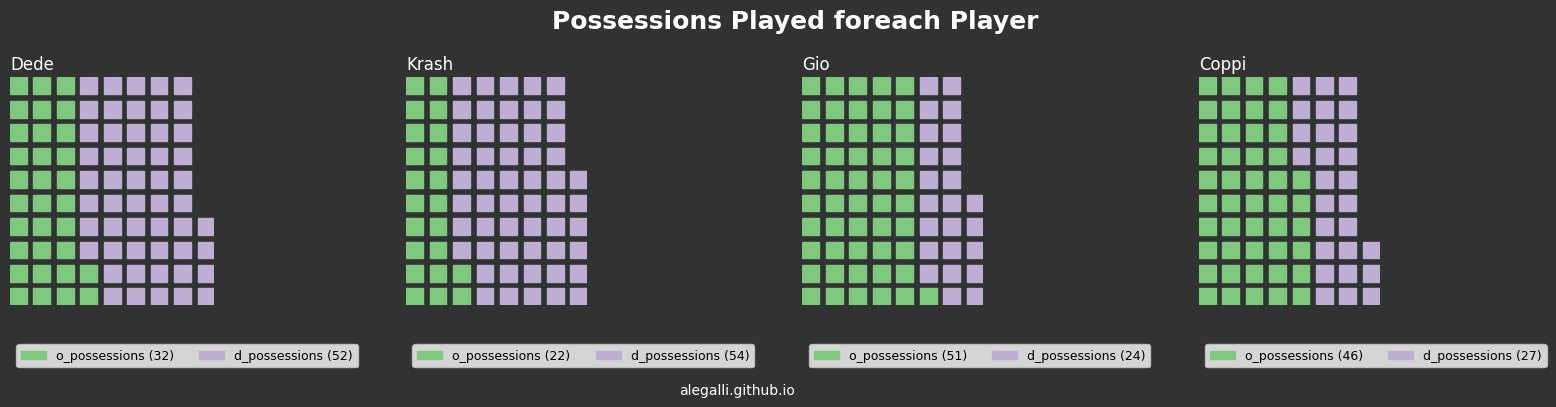

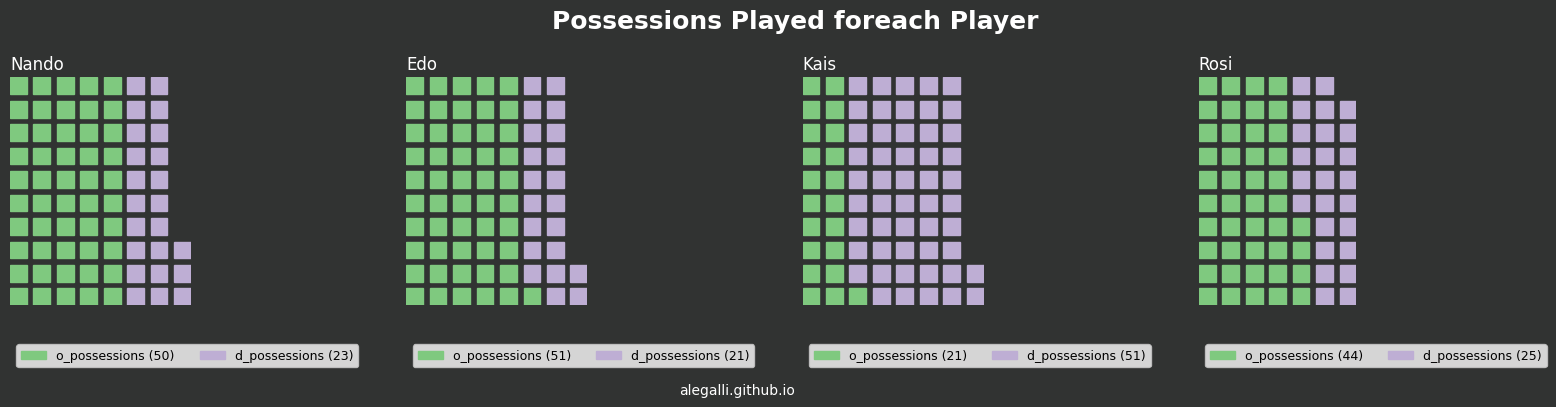

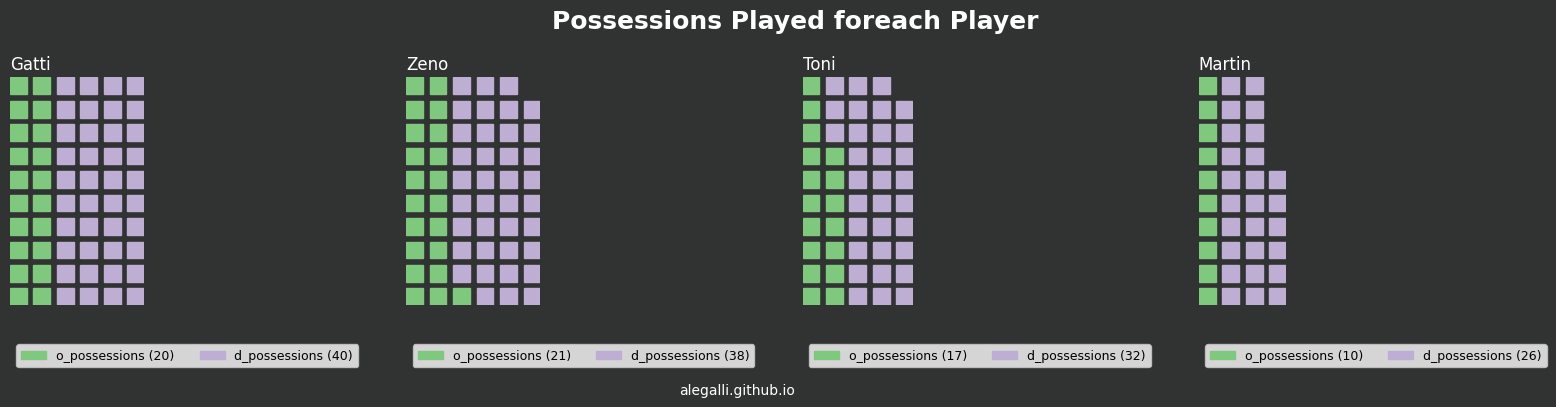

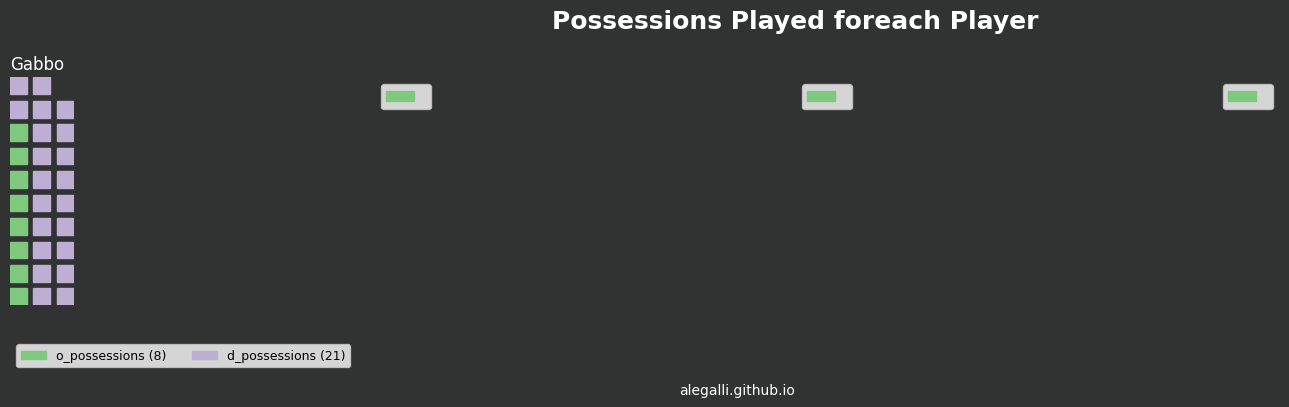

In [110]:
# Py Waffle Plots Total Possessions Played foreach Player
for i in range(total_rows):
    start_idx = i * players_per_row
    end_idx = min(start_idx + players_per_row, len(player_names))
    current_players = player_names[start_idx:end_idx]

    plots = {}
    for j, player in enumerate(current_players):
        plots[141 + j] = {
            'values': df[player],
            'labels': [f"{k} ({v})" for k, v in df[player].items()],
            'legend': {'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(df), 'fontsize': 9},
            'title': {'label': player, 'loc': 'left', 'color': 'white', 'fontsize': 12}
        }
    # Fill remaining slots with "dummy" invisible waffle plots
    for j in range(len(current_players), players_per_row):
        plots[141 + j] = {
            'values': { '': 0 }  # Minimal, valid placeholder value
        }

    # Create the figure
    fig = plt.figure(
        FigureClass=Waffle,
        plots=plots,
        rows=10,
        # columns=max_tot_ps/10,
        cmap_name="Accent",
        rounding_rule='ceil',
        figsize=(16, 4),
        interval_ratio_x=0.4,
        interval_ratio_y=0.4,
        facecolor=background
    )

    fig.suptitle('Possessions Played foreach Player', fontsize=18, fontweight='bold', color='white')
    fig.supxlabel('alegalli.github.io', fontsize=10, ha='right', color='white')

# plt.show()


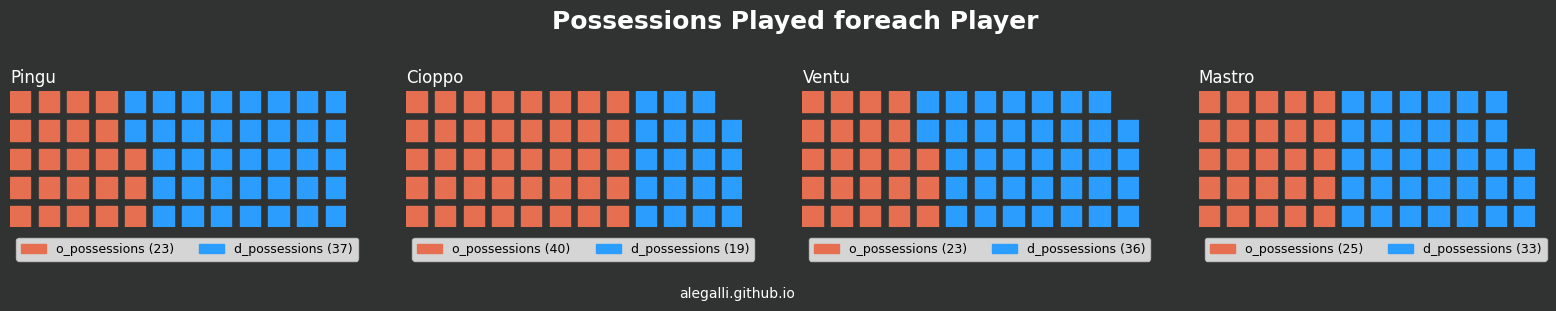

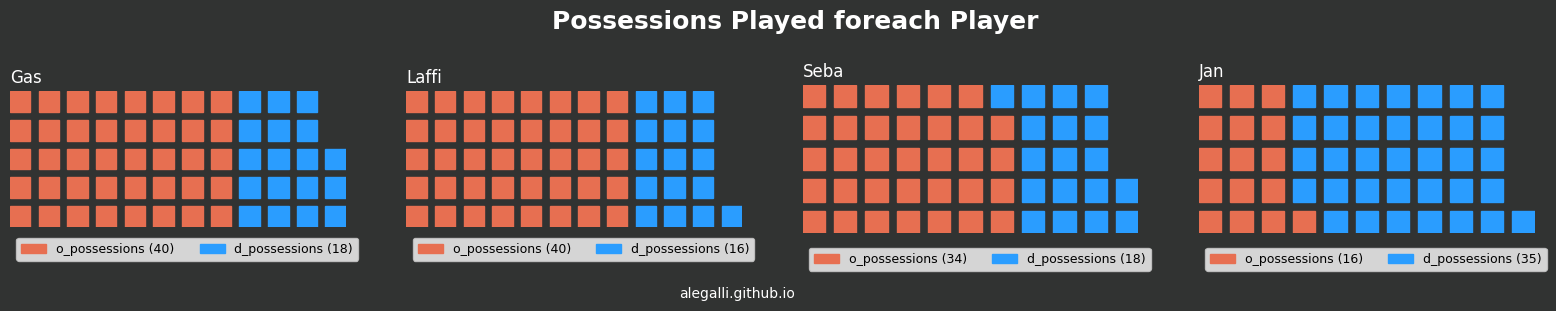

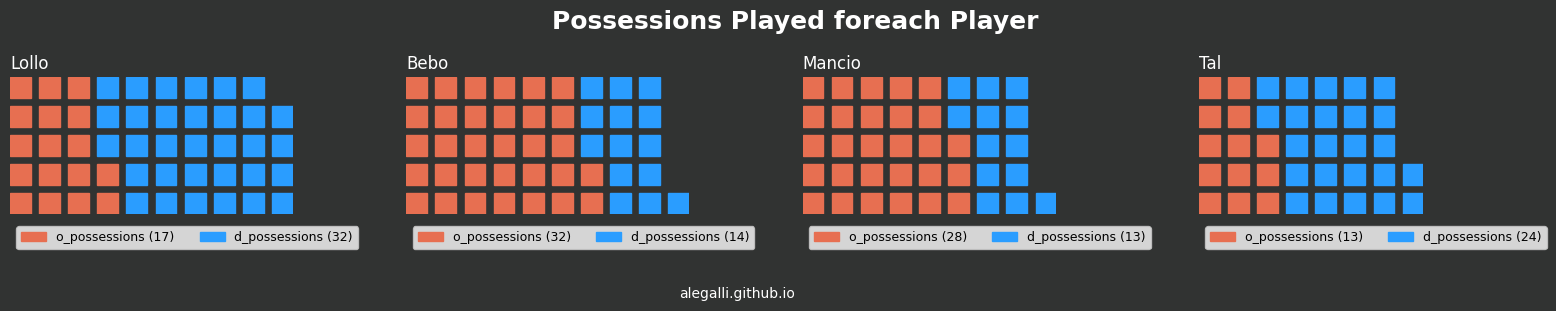

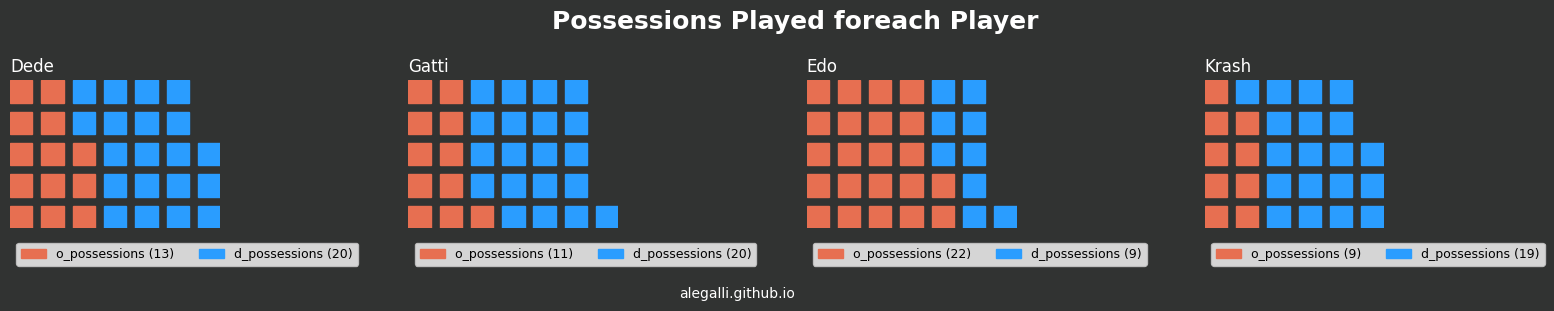

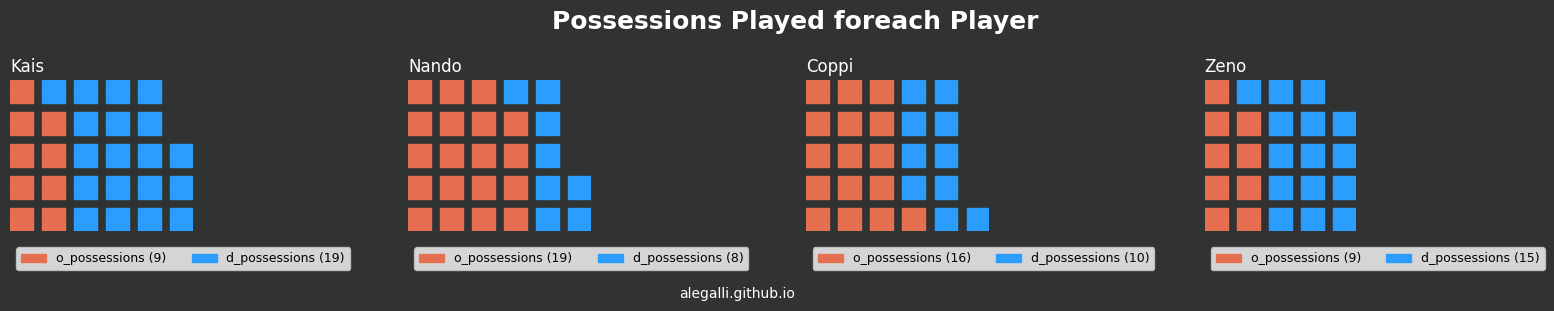

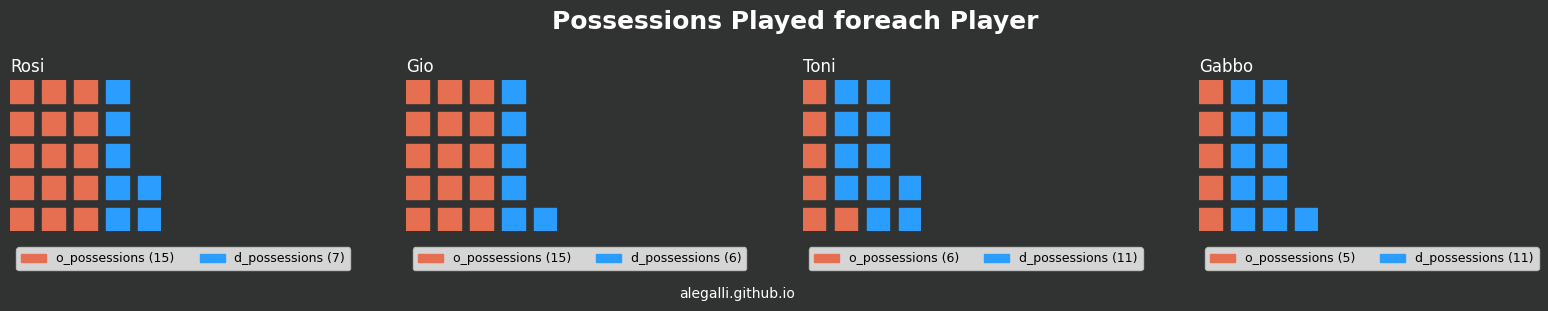

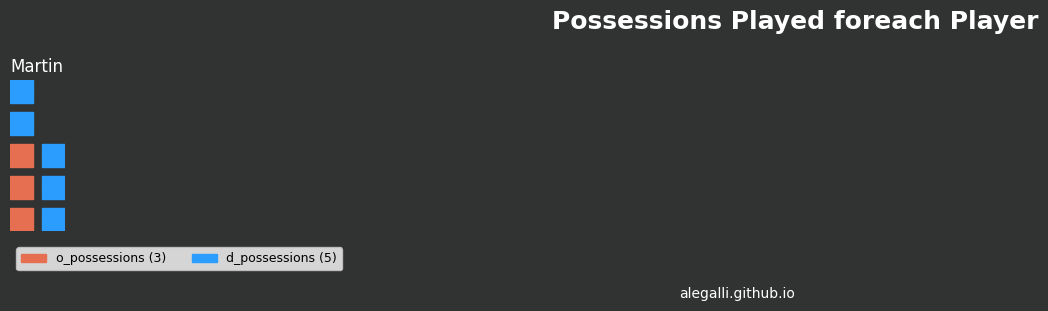

In [111]:
# Py Waffle Plots Total Possessions Played foreach Player
clutch_colors=["#e76f51","#2a9dff"] #"#eae2b7", "#e76f51","#f4a261","#e9c461","#2a9d8f"]
for i in range(total_rows):
    start_idx = i * players_per_row
    end_idx = min(start_idx + players_per_row, len(player_names_clutch))
    current_players = player_names_clutch[start_idx:end_idx]

    plots = {}
    for j, player in enumerate(current_players):
        plots[141 + j] = {
            'values': df_clutch[player],
            'labels': [f"{k} ({v})" for k, v in df_clutch[player].items()],
            'legend': {'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(df_clutch), 'fontsize': 9},
            'title': {'label': player, 'loc': 'left', 'color': 'white', 'fontsize': 12}
        }
    # Fill remaining slots with "dummy" invisible waffle plots
    # for j in range(len(current_players), players_per_row):
    #     plots[141 + j] = {
    #         'values': { '': 0 },  # Minimal, valid placeholder value
    #         'lables': [f"{k} ({v})" for k, v in df_clutch[player].items()]
    #     }

    # Create the figure
    fig = plt.figure(
        FigureClass=Waffle,
        plots=plots,
        rows=5,
        # columns=max_tot_ps/10,
        cmap_name="Accent",
        rounding_rule='ceil',
        figsize=(16, 3),
        interval_ratio_x=0.4,
        interval_ratio_y=0.4,
        facecolor=background,
        colors=clutch_colors
    )

    fig.suptitle('Possessions Played foreach Player', fontsize=18, fontweight='bold', color='white')
    fig.supxlabel('alegalli.github.io', fontsize=10, ha='right', color='white')

# plt.show()


# Calculate and Explain the median of each KPI for the Whole Team

# Median of each KPI for Roles and Offensive/Defensive Lines

# Waffleplot KPI for each Player